# Introduction

## Diabetes Prediction

Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```


### Data Analysis
2. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   df.duplicated().sum()
   df.isna().values.sum()
   ```

3. Vérifiez s'il existe des data qui valent 0:<br>
   ```
   (df == 0).sum()
   ```

4. Dans les colonnes où cela est pertinent, remplacez les 0 par la moyennes des valeurs non nulle:<br>
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html<br>
   **Remarque:** cette pratique, appelée **imputing** s'effectue normalement après le train-test split...


5. Visualisez la matrice des correlations et les correlations deux-à-deux de des variables de votre dataset (pairwise correlations):
    ```
    # correlation matrix
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    
    # pairwise correlations
    sns.pairplot(df)
    ```

6. Visualisez la répartition des valeurs de la variable `Outcome`:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```
   
7. Visualisez la répartition des valeurs de la variable `Glucose`:<br> 
   ```
   ...
   plt.scatter(df.index, df.Glucose, c=df.Outcome)
   ...
   ```


### > Problème de classification
### Train-Test Split
8. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
9. Instanciez et entraînez une **régression logistique** `LogisticRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


10. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    
    

### > Problème de régression
### Train-Test Split
11. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
12. Instanciez et entraînez une **régression linéaire** `LinearRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


13. Faites le graphique des `y` que vous avez prédits sur le test set en fonction des vraies valeurs `y_test`.<br>
   Ce graphique devrrait avoir une allure diagonale, pourquoi? Est-ce le cas ici?

## Libraries

In [203]:
#!pip install --upgrade seaborn

In [336]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [317]:
df = pd.read_csv('./data/diabetes.csv')

In [218]:
df.shape

(768, 9)

In [219]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Analysis

In [221]:
# check duplicates
df.duplicated().sum()

0

In [222]:
# check missing values
df.isna().values.sum()

0

In [223]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [224]:
# I removed "Insulin"...

for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI"]:

    mean = df[df[col] != 0][col].mean()
    df[col] = df[col].replace(0, mean)

In [225]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<AxesSubplot:>

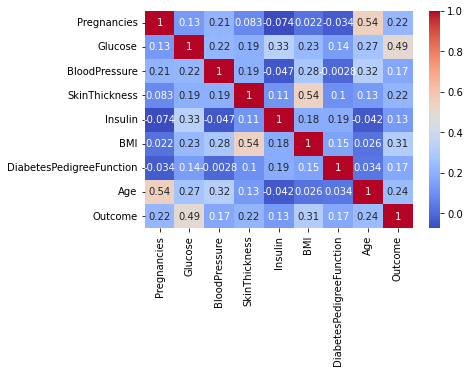

In [226]:
# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

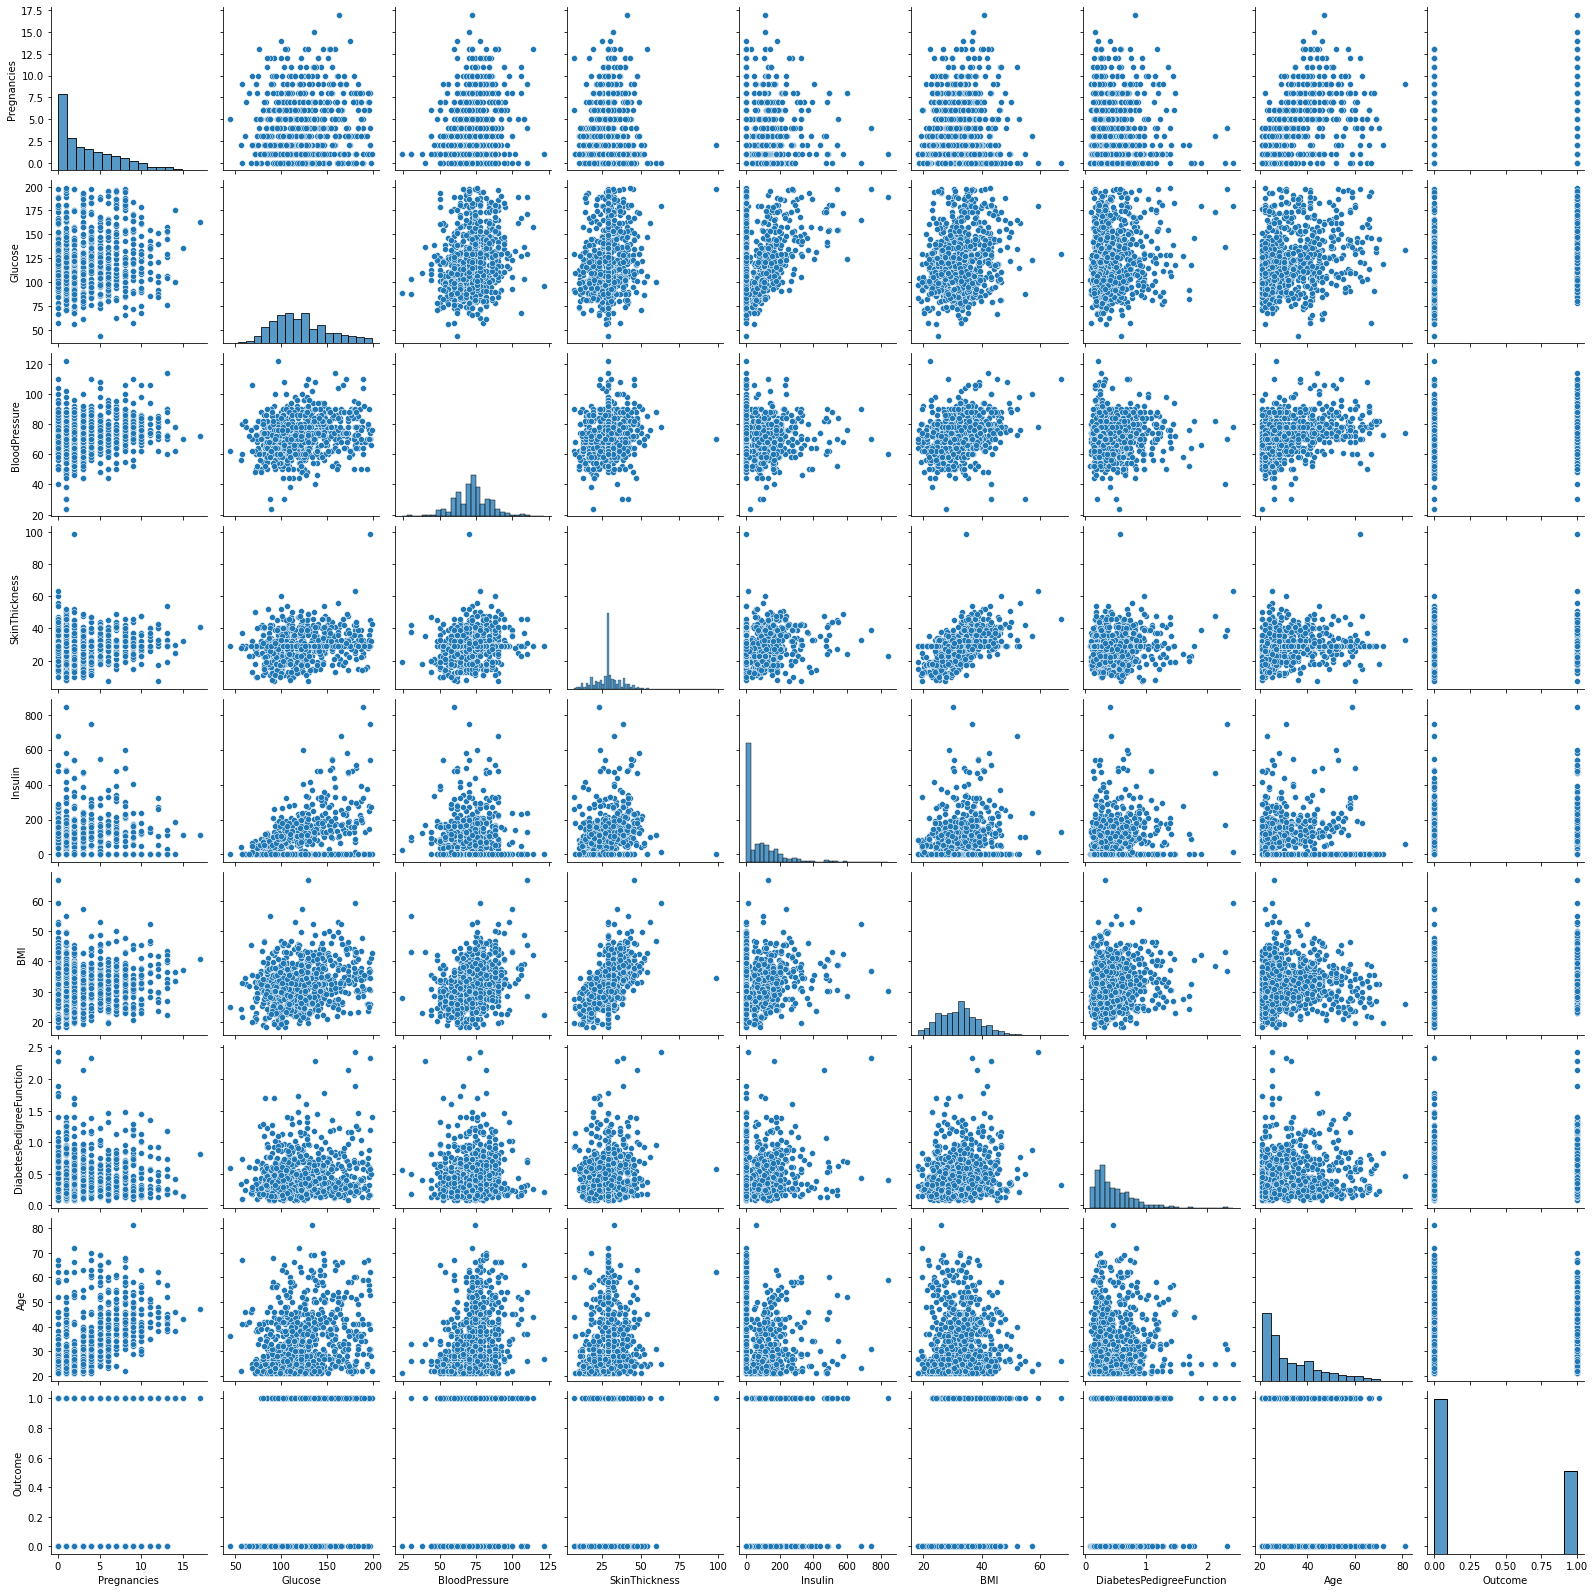

In [227]:
# pairwise correlations
sns.pairplot(df)

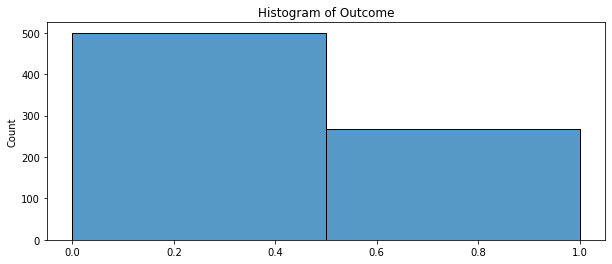

In [228]:
# histogram of Outcome variable
plt.figure(figsize=(10, 4))

plt.title('Histogram of Outcome')
sns.histplot(df.Outcome.values, bins=2)

plt.show()
# the variable Outcome is imbalanced

> ## Problème de classification

## Train-Test Split

In [253]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [254]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [255]:
X_test.shape, y_test.shape

((154, 8), (154,))

## Model and Results

In [256]:
# 1. Instancier le moddèle
lr = LogisticRegression(max_iter=1000)

# 2. Entraîner le modèle
lr.fit(X_train, y_train)

# 3. Effectuer les préictions (test set)
y_test_preds = lr.predict(X_test)

In [257]:
y_test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [258]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [259]:
error = (y_test_preds != y_test.values).sum() / len(y_test)
error

0.23376623376623376

In [260]:
# accuracy
1 - error

0.7662337662337663

In [261]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.812     0.828     0.820        99
           1      0.679     0.655     0.667        55

    accuracy                          0.766       154
   macro avg      0.746     0.741     0.743       154
weighted avg      0.765     0.766     0.765       154



In [262]:
# Autre modèle: random forest

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)

In [263]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.760     0.960     0.848        99
           1      0.862     0.455     0.595        55

    accuracy                          0.779       154
   macro avg      0.811     0.707     0.722       154
weighted avg      0.796     0.779     0.758       154



In [264]:
# Autre modèle: SVC

svc = SVC()
svc.fit(X_train, y_train)
y_test_preds = svc.predict(X_test)

In [265]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.784     0.879     0.829        99
           1      0.721     0.564     0.633        55

    accuracy                          0.766       154
   macro avg      0.752     0.721     0.731       154
weighted avg      0.761     0.766     0.759       154



In [268]:
# Autre modèle: KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_preds = knn.predict(X_test)

In [269]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.788     0.828     0.808        99
           1      0.660     0.600     0.629        55

    accuracy                          0.747       154
   macro avg      0.724     0.714     0.718       154
weighted avg      0.743     0.747     0.744       154



In [270]:
# Grid search

parameters = {"max_depth":[2, 4, 6, 8],
              "min_samples_split": [2, 4, 8, 16], 
              "min_samples_leaf": [1, 5, 10, 15],
              "n_estimators": [100]}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [100]})

In [271]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [272]:
rf_grid.best_score_

0.7834732773557244

In [273]:
y_test_preds = rf_grid.predict(X_test)

In [274]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.796     0.788     0.792        99
           1      0.625     0.636     0.631        55

    accuracy                          0.734       154
   macro avg      0.710     0.712     0.711       154
weighted avg      0.735     0.734     0.734       154



> ## Problème de régression

## Train-Test Split

In [275]:
df_new = pd.get_dummies(df, columns=["Outcome"], dtype=int)

In [276]:
X = df_new.drop(["Glucose"], axis=1)
y = df_new["Glucose"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

<AxesSubplot:>

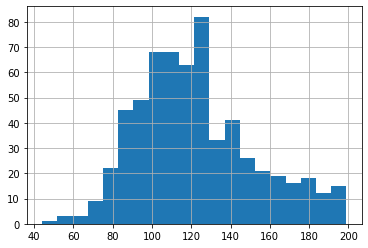

In [285]:
y_train.hist(bins=20)

In [286]:
X

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
0,6,72.0,35.00000,0,33.6,0.627,50,0,1
1,1,66.0,29.00000,0,26.6,0.351,31,1,0
2,8,64.0,29.15342,0,23.3,0.672,32,0,1
3,1,66.0,23.00000,94,28.1,0.167,21,1,0
4,0,40.0,35.00000,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,10,76.0,48.00000,180,32.9,0.171,63,1,0
764,2,70.0,27.00000,0,36.8,0.340,27,1,0
765,5,72.0,23.00000,112,26.2,0.245,30,1,0
766,1,60.0,29.15342,0,30.1,0.349,47,0,1


In [288]:
# norm = Normalizer()
# norm.fit(X_train)
# X_train = norm.transform(X_train)
# X_test = norm.transform(X_test)

std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

## Models and Results

In [289]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_test_preds = lin_reg.predict(X_test)

In [290]:
y_test_preds

array([121.26408355, 102.31573603,  99.15308319, 108.14633565,
       117.03924849, 130.43318628, 101.86643025, 113.91205679,
       117.77226281, 121.42114257, 131.50746942, 122.88636098,
       150.58391263, 119.52342191, 100.78869636, 137.23161785,
       104.81341821, 106.77223227, 131.82984567, 138.83571147,
       112.23284721, 112.93393862, 106.42389243, 107.03786765,
       118.64875411, 137.14631025,  99.27825402, 109.0771387 ,
       140.92026453, 117.95234609, 138.08787599, 148.78018728,
       152.48180124, 132.30000219, 123.90214062, 145.80115511,
       135.050027  , 139.67784081, 119.17211712, 130.89076597,
       104.76854613, 114.95843596, 120.08468528, 131.51595433,
       106.81772267, 149.4589228 , 157.85937865, 104.10700346,
       116.14235353, 143.75610425,  98.96829136, 155.56121562,
       167.27587412, 126.99643231, 115.67422122, 104.56956572,
       117.88893699, 101.79945154, 111.46330762, 132.07150667,
       136.9527197 , 104.90357276, 148.91123221, 155.12

In [291]:
y_test.values

array([ 98., 112., 108., 107., 136., 103.,  71., 117., 154., 147., 111.,
       179., 148.,  96.,  88., 125.,  84.,  86., 183., 140., 104.,  88.,
       106.,  96., 129., 184., 109., 100., 102.,  89., 162., 146., 184.,
       167., 109., 152., 197., 109., 121., 131.,  85., 135., 109., 104.,
        92., 158., 111.,  95., 112., 173.,  94., 145., 140., 134., 139.,
        74., 158.,  80., 121., 168., 154., 122., 129.,  92.,  84., 147.,
        81., 137., 104., 172., 150.,  83.,  91.,  95., 103., 103., 105.,
        96., 117., 110., 159., 104.,  75., 135., 119., 187., 152., 124.,
        99.,  87.,  93.,  92.,  74., 120., 123., 144., 106.,  83., 177.,
        62., 164.,  78., 126., 146., 158., 112., 141., 173.,  80., 109.,
        97., 175., 105., 167., 112., 124., 162., 110.,  91., 115., 105.,
       100., 119.,  90., 151., 101., 115., 155., 135., 189., 183., 151.,
       109., 136., 181., 102., 120., 158., 150.,  68., 112.,  90., 139.,
       139.,  93.,  84.,  85.,  73., 112., 165.,  7

In [292]:
((y_test_preds - y_test.values)**2).sum() / len(y_test)

664.8776873381058

In [293]:
mean_squared_error(y_test, y_test_preds)

664.8776873381058

In [294]:
np.abs(y_test_preds - y_test.values).sum() / len(y_test)

20.436656645630784

In [295]:
mean_absolute_error(y_test, y_test_preds)

20.436656645630784

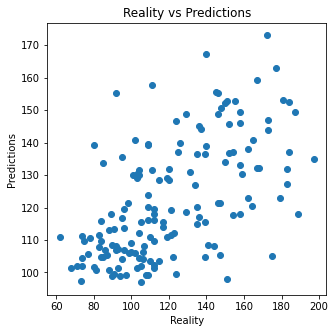

In [296]:
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_test_preds)
plt.title("Reality vs Predictions")
plt.xlabel("Reality")
plt.ylabel("Predictions")

plt.show()

In [382]:
# new model: Random Forest

rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)

In [383]:
mean_squared_error(y_test, y_test_preds)

652.8209429983974

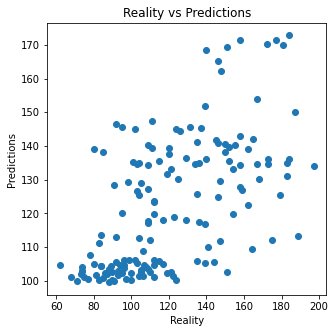

In [384]:
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_test_preds)
plt.title("Reality vs Predictions")
plt.xlabel("Reality")
plt.ylabel("Predictions")

plt.show()